In [20]:
from statistics_obj import Statistics_obj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
my_data = Statistics_obj.load("./data/RMEO4_data_stats_large.pkl")
print(my_data.attributes)

['too_few_stars', 'id_sensor', 'num_objects', 'empty_image', 'object_type', 'x_center', 'y_center', 'flux', 'num_sats', 'num_stars', 'exposure', 'rain_condition', 'rain', 'humidity', 'windspeed', 'dates', 'times']


Counter({False: 2646, True: 2340})


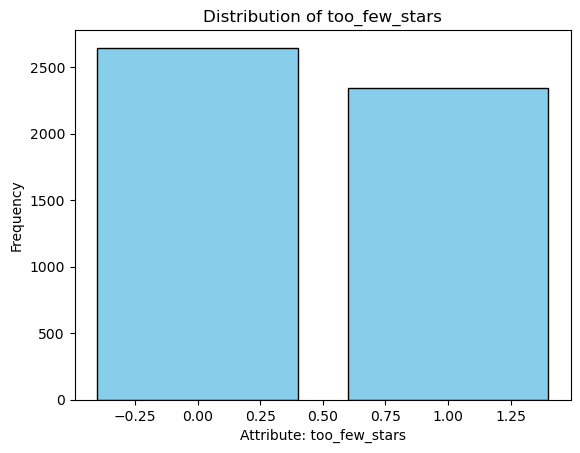

Counter({'PDS-RME04': 4990})


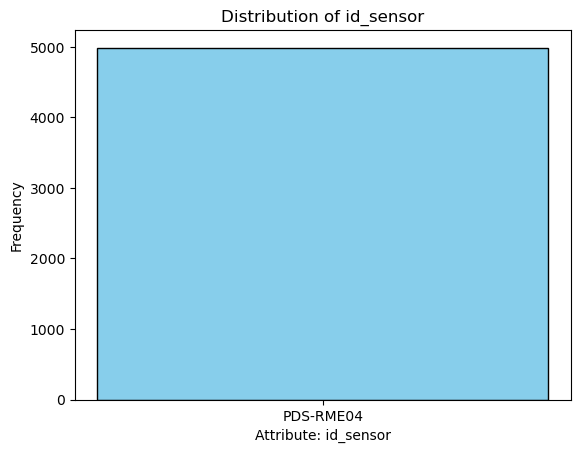

Counter({0: 2789, 1: 2097, 2: 75, 3: 29})


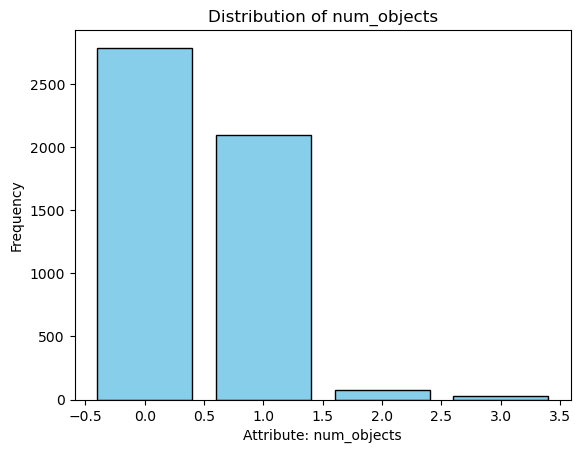

Counter({False: 3488, True: 1497})


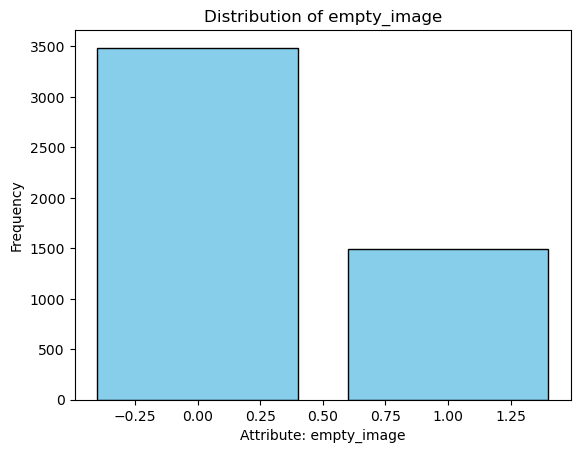

Counter({'Satellite': 2322, 'Unknown': 12})


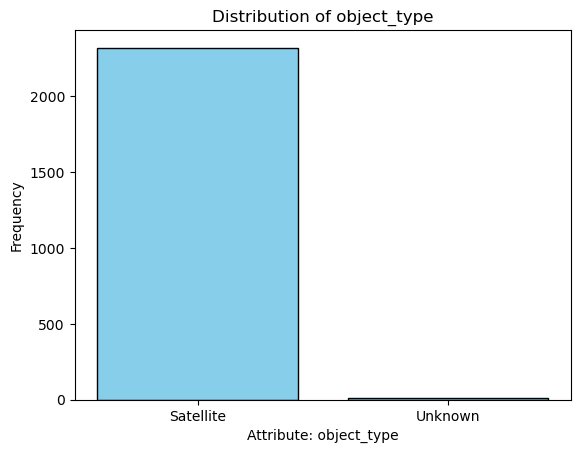

Counter({1: 2089, 2: 73, 3: 29, 0: 10})


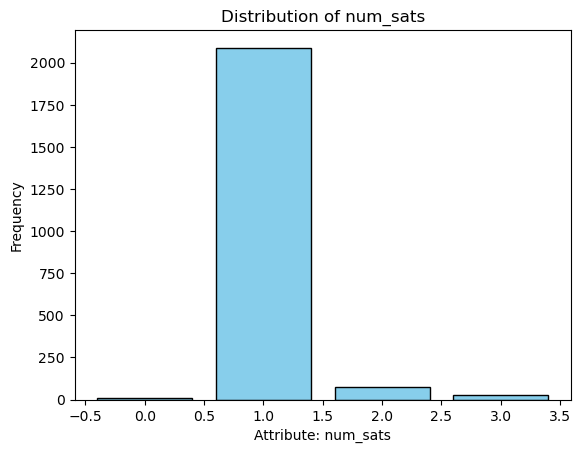

Counter({0: 2201})


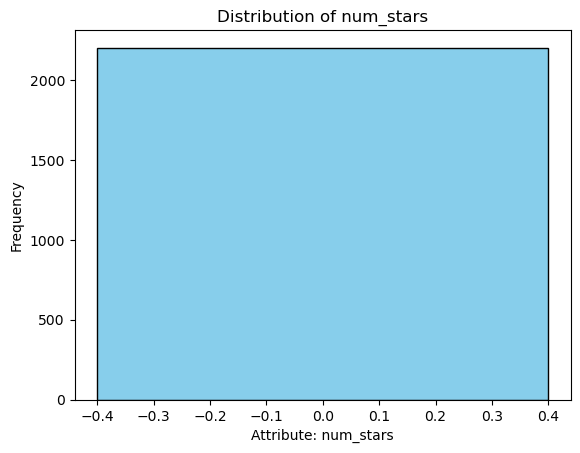

Counter({'1': 2200})


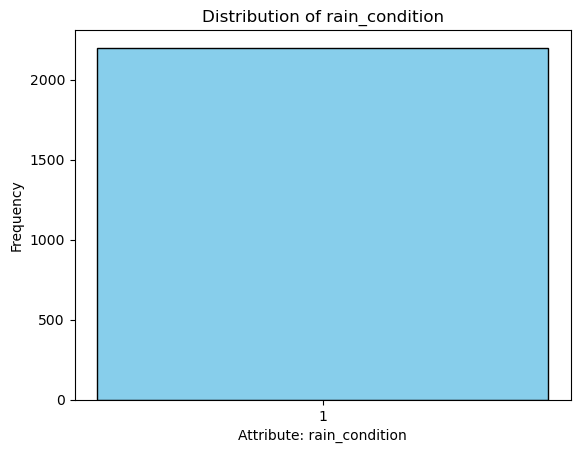

Counter({'0': 2200})


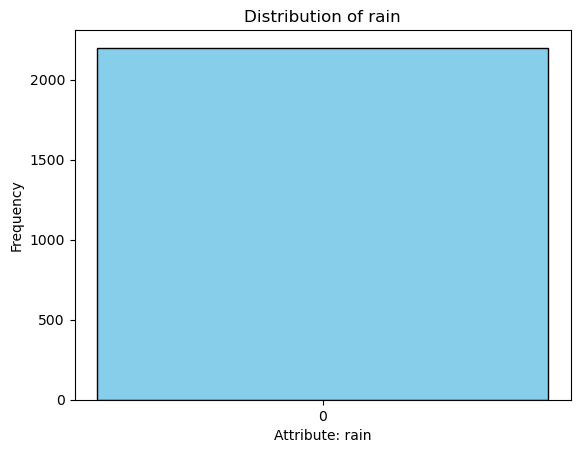

In [26]:
for index, title in enumerate(my_data.attributes):
    if title=="x_center" or title=="y_center" or title=="flux" or title=="exposure" or title=="humidity" or title=="windspeed" or title=="dates" or title=="times":
        continue

    counts = Counter(my_data.data[index])
    counts = Counter({k: v for k, v in counts.items() if k is not None})
    labels, values = zip(*counts.items())
    print(counts)

    plt.bar(labels, values, color="skyblue", edgecolor="black")
    plt.xlabel(f"Attribute: {title}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {title}")
    plt.show()



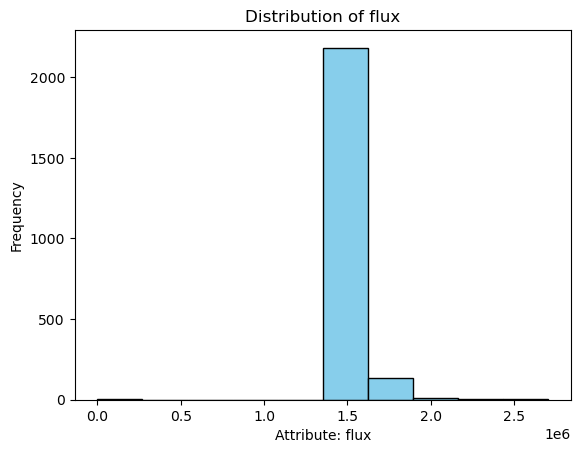

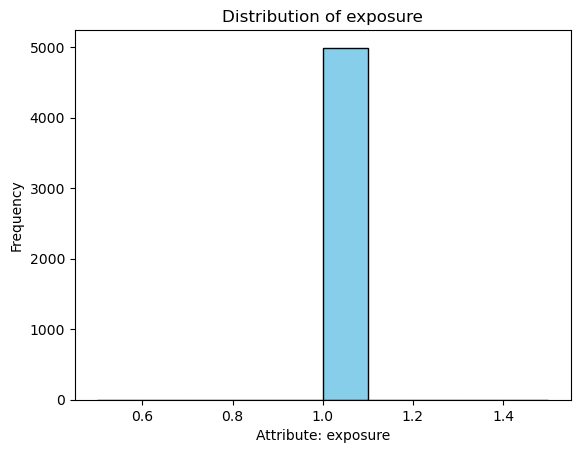

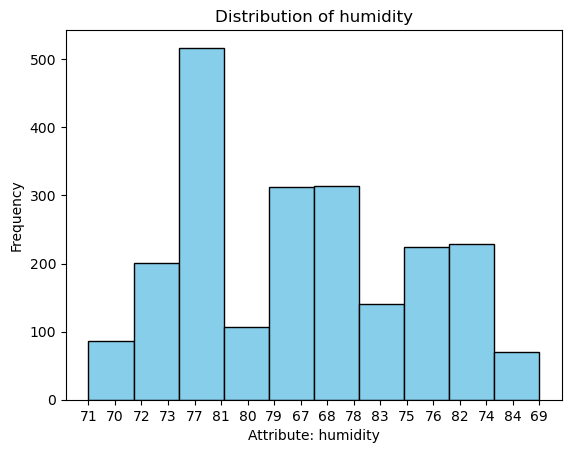

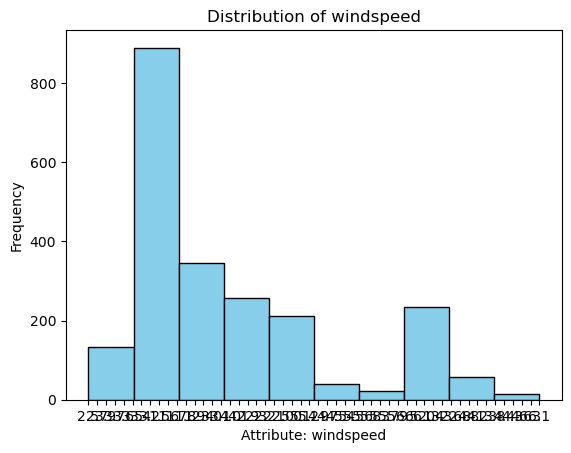

In [27]:
for index, title in enumerate(my_data.attributes):
    if title=="flux" or title=="exposure" or title=="humidity" or title=="windspeed":
        plt.hist(my_data.data[index], color="skyblue", edgecolor="black")
        # plt.xticks(np.linspace(min(my_data.data[index])-.01, max(my_data.data[index])+.01, num=10), rotation=45)
        plt.xlabel(f"Attribute: {title}")
        # plt.xticks(np.linspace(min(my_data.data[index]), max(my_data.data[index]), num=10))
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {title}")
        plt.show()

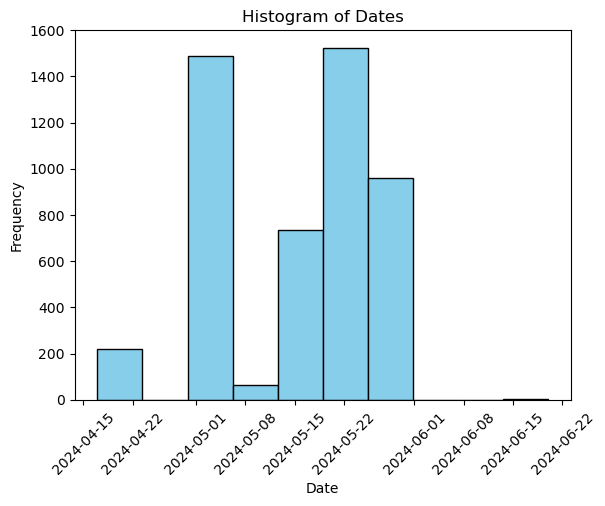

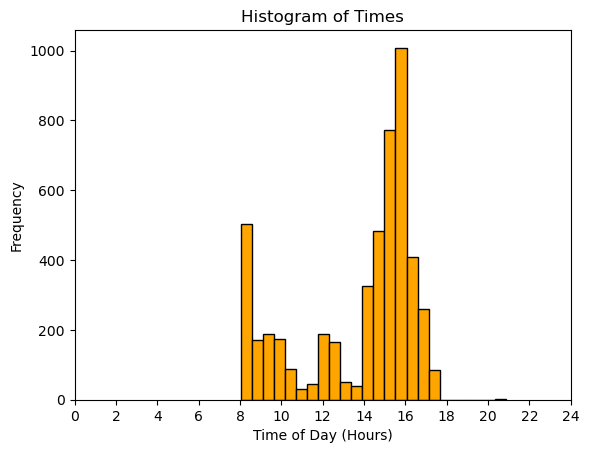

In [28]:
for index, title in enumerate(my_data.attributes):
    if title=="dates":
        dates = pd.to_datetime(my_data.data[index])
        plt.hist(dates, bins=10, color="skyblue", edgecolor="black")
        plt.xlabel("Date")
        plt.ylabel("Frequency")
        plt.title("Histogram of Dates")
        plt.xticks(rotation=45)
        plt.show()
    if title=="times":
        times = [pd.to_datetime(t, format="%H:%M:%S").time() for t in my_data.data[index]]
        time_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in times]
        plt.hist(time_hours, bins=24, color="orange", edgecolor="black")
        plt.xlabel("Time of Day (Hours)")
        plt.ylabel("Frequency")
        plt.title("Histogram of Times")
        plt.xticks(range(0, 25, 2)) 
        plt.show()
                



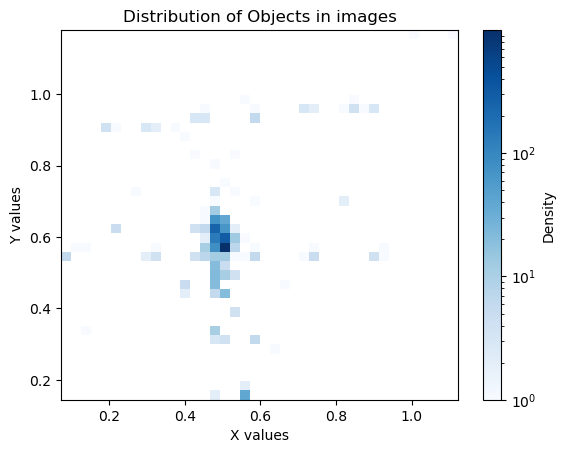

In [ ]:
import matplotlib as mpl
title=="x_center" or title=="y_center"

for index, title in enumerate(my_data.attributes):
    if title=="x_center":
        plt.hist2d(my_data.data[index], my_data.data[index+1], norm=mpl.colors.LogNorm(), bins=40, cmap="Blues")
        plt.colorbar(label="Density")
        plt.xlabel("X values")
        plt.ylabel("Y values")
        plt.title("Log Distribution of Objects in images")
        plt.show()